## BigMart Sales Prediction

### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. 

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Hypotheses

Let's categorize our hypothesis into following 2 categories: -

<b> Store Level Hypotheses:
1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.
4. Competitors: Stores have similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

<b> Product Level Hypotheses:
1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

### Data Exploration

We will be performing some basic data exploration here and come up with some inferences about the data.

Let's import libraries and load train and test dataset.

In [25]:
import pandas as pd
import numpy as np

#Read files:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. Lets combine them into a dataframe 'data' with a 'source' column specifying where each observation belongs.

In [26]:
train['source']='train'
test['source']='test'
data=pd.concat([train, test], ignore_index=True, sort=False)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


Thus we can see that data has same number of columns but rows equivalent to both test and train. One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [27]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Note that the Item_Outlet_Sales is the target variable and missing values are ones in the test set. So we need not worry about it. But we'll impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.

Lets look at some basic statistics for numerical variables.

In [28]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Some observations:

1. <b>Item_Visibility</b> has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2. <b>Outlet_Establishment_Years</b> vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
3. The lower 'count' of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

Moving to nominal(categorical) variable, lets have a look at the number of unique values in each of them

In [29]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

This tells us that there are <b>1559 products and 10 outlets/stores</b> (which was also mentioned in problem statement). Another thing that should catch attention is that <b>Item_Type has 16 unique values</b>. Let's explore further using the frequency of different categories in each nominal variable. I'll exclude the ID and source variables for obvious reasons.

In [30]:
#Filter categorical variables

categorical_columns= [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_columns= [x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier','source']]

#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable ',col)
    print(data[col].value_counts())


Frequency of Categories for variable  Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable  Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable  Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for variable  Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: 

The output gives us following observations:
1. <b>Item_Fat_Content:</b> Some of 'Low Fat' values mis-coded as 'low fat' and 'LF'.Also, some of 'Regular' are mentioned as 'regular'.
2. <b>Item_Type:</b> Not all categories have substantial numbers. It looks like combining them can give better results.
3. <b>Outlet_Type:</b> Supermarket Type2 and Type3 can be combined. But we should check if that's a good idea before doing it.

### Data Cleaning

This step typically involves imputing missing values and treating outliers. Though outlier removal is very important in regression techniques, advanced tree based algorithms are impervious to outliers. So I'll leave it to you to try it out. We'll focus on the imputation step here, which is a very important step.

#### <b>Imputing Missing Values

We found two variables with missing values - Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item. This can be done as:

In [31]:
#Determine the average weight per item:
item_avg_weight= data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool=data['Item_Weight'].isnull()

#Impute data and check #missing values before and after imputation to confirm 
print("Original #missing: ", sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print("Final #missing: ", sum(data['Item_Weight'].isnull()))

Original #missing:  2439
Final #missing:  0


This confirms that the column has no missing values now. Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [32]:
#impofg mode function:
from scipy.stats import mode

#Determining the mode for each
outlet_size_mode=data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:mode(x.dropna()).mode[0]))
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool=data['Outlet_Size'].isnull()

#Impute data and check #missing values before and after imputation to confirm
print("\n Original #missing : ", sum(miss_bool))

data.loc[miss_bool,'Outlet_Size']=data.loc[miss_bool,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])
print(sum(data['Outlet_Size'].isnull()))

/home/priyesh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

 Original #missing :  4016
0


This confirms that there are no missing values in the data. Let's move on to feature engineering now.

### Feature Engineering

We explored some nuances in the data in the data exploration section. Lets move on to resolving them and making our data ready for analysis. We will also create some new variables using the existing ones in this section.

#### <b> Step 1: Consider combining Outlet_Type

During exploration, we decided to consider combining the Supermarket Type2 and Type3 variables. But is that a good idea? A quick way to check that could be to analyze the mean sales by type of store. If they have similar sales, then keeping them separate won't help much.

In [33]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


This shows significant difference between them and we'll leave them as it is. Note that just one way of doing this, you can perform some other analysis in different situations and also do the same for other features.

#### <b> Step 2: Modify Item_Visibility

We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [34]:
#Determine average visibility of a product
visibility_avg=data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool= (data['Item_Visibility']==0)

print("Number of 0 values initially: ",sum(miss_bool))

data.loc[miss_bool,'Item_Visibility']=data.loc[miss_bool,'Item_Identifier'].apply(lambda x:visibility_avg.loc[x])
print('Number of 0 values after modification',sum(data['Item_Visibility']==0))

Number of 0 values initially:  879
Number of 0 values after modification 0


So we can see that there are no values which are zero.

In step 1 we hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visbility of the product in that particular store as compared to the mean visbility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the 'visbility_avg' variable made above to achieve this.

In [35]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio']=data.apply(lambda x:x.loc['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


Thus the new variable has been successfully created. 

#### <b>Step 3: Create a broad category of Type of Item

Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there's a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I've used the Item_Identifier variable to create a new column:

In [36]:
#Get the first two characters of ID:
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### <b>Step 4: Determine the years of operation of a store

We wanted to make a new column depicting the years of operation of a store. This can be done as:

In [37]:
#Years:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

This shows stores which are 4-28 years old. 

#### <b>Step 5: Modify categories of Item_Fat_Content

We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

In [38]:
#Change categories of low fat:
print("Original Categories")
print(data['Item_Fat_Content'].value_counts())
print("\nModified Categories:")
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Now it makes more sense. But hang on, in step 4 we saw there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [39]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

#### <b>Step 6: Numerical and One-Hot Coding of Categorical variables

Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable 'Outlet' same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.

Let's start with coding all categorical variables as numeric using 'LabelEncoder' from sklearn's preprocessing module.

In [40]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#New variable for outlet
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le=LabelEncoder()
for i in var_mod:
    data[i]=le.fit_transform(data[i])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories- 'Low Fat', 'Regular' and 'Non-Edible'. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers - 0 (if the category is not present) and 1 (if category is present). This can be done using 'get_dummies' function of Pandas.

In [41]:
#One Hot Coding:
data=pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

Lets look at the datatypes of columns now:

In [42]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

Here we can see variables are either float or integer. Let look at the 3 columns formed from Item_Fat_Content

In [43]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


We can notice that each row have one of the columns as 1 corresponding to the category in the original variable.

#### <b>Step 7: Exporting Data

Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code:

In [49]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'], axis=1, inplace=True)

#Divide into test and train:
train=data.loc[data['source']=="train"]
test=data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)


### Model Building

Now that we have the data ready, its time to start making predictive models. I will take you through 6 models including linear regression, decision tree and random forest.

Lets start by making a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, in this case lets predict the sales as the overall average sales. This can be done as: 

In [50]:
#Mean based:
mean_sales=train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1=test[['Item_Identifier','Outlet_Identifier']]
base1.loc['Item_Outlet_Sales']=mean_sales

#Export submission file
base1.to_csv("a1g0.csv",index=False)

/home/priyesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


We will make many models, instead of repeating the codes again and again, I would like to define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates submission. 

In [51]:
# Define target and ID columns:
target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    
    #Predict training set
    dtrain_predictions=alg.predict(dtrain[predictors])
    
    #Perform cross-validation:
    cv_score=cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score=np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : ",np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4f | Std - %.4f | Min - %.4f | Max - %.4f", (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)) )
    
    #Predict on testing data:
    dtest[target]= alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission=pd.DataFrame({x:dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

#### <b>Linear Regression Model

Let's start with making a linear regression model


Model Report
RMSE :  1127.4061690195151
CV Score : Mean - %.4f | Std - %.4f | Min - %.4f | Max - %.4f (1129.2102209047407, 43.87772982960886, 1074.1295754261266, 1214.6112511319618)


/home/priyesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


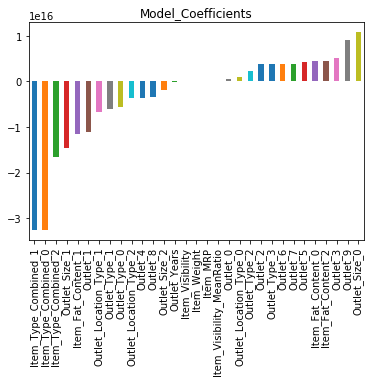

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors=[x for x in train.columns if x not in [target]+IDcol]

#print predictors
alg1=LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1=pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model_Coefficients')

#### <b>Ridge Regression Model:


Model Report
RMSE :  1181.2259813090436
CV Score : Mean - %.4f | Std - %.4f | Min - %.4f | Max - %.4f (1181.669837410489, 53.63069017229698, 1105.277489449199, 1297.4383845473048)


/home/priyesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


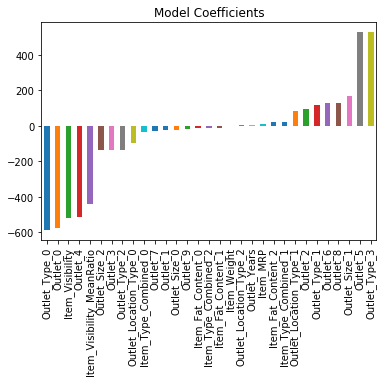

In [56]:
predictors=[x for x in train.columns if x not in [target]+IDcol]
alg2=Ridge(alpha=0.5, normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2=pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

#### <b> Decision Tree Model


Model Report
RMSE :  1057.6934941675377
CV Score : Mean - %.4f | Std - %.4f | Min - %.4f | Max - %.4f (1091.4968931846693, 45.42000196190128, 1002.7950800985651, 1186.4108567725732)


/home/priyesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


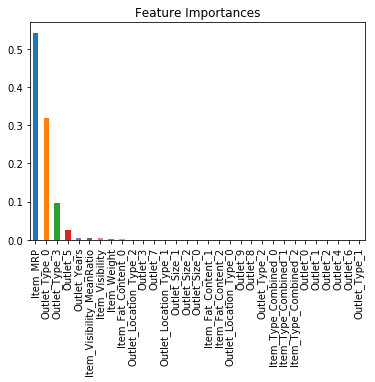

In [60]:
from sklearn.tree import DecisionTreeRegressor
predictors=[x for x in train.columns if x not in [target] +IDcol]
alg3=DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3=pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')